Add the dependencies

In [13]:
import pandas as pd          
import numpy as np            

import matplotlib.pyplot as plt   
import seaborn as sns 

Import the relevant files, show preview, and all column and datatype breakdown

In [14]:
dataset = pd.read_csv("twitchdata-update.csv")
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB


Ensure that there are no NULL entries in our DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB
Channel                 0
Watch time(Minutes)     0
Stream time(minutes)    0
Peak viewers            0
Average viewers         0
Followers               0
Followers gained        0
Vi

/Users/zakariachowdhury/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54413 (\N{HANGUL SYLLABLE PUNG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/zakariachowdhury/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/zakariachowdhury/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/zakariachowdhury/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/zakariachowdhury/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWar

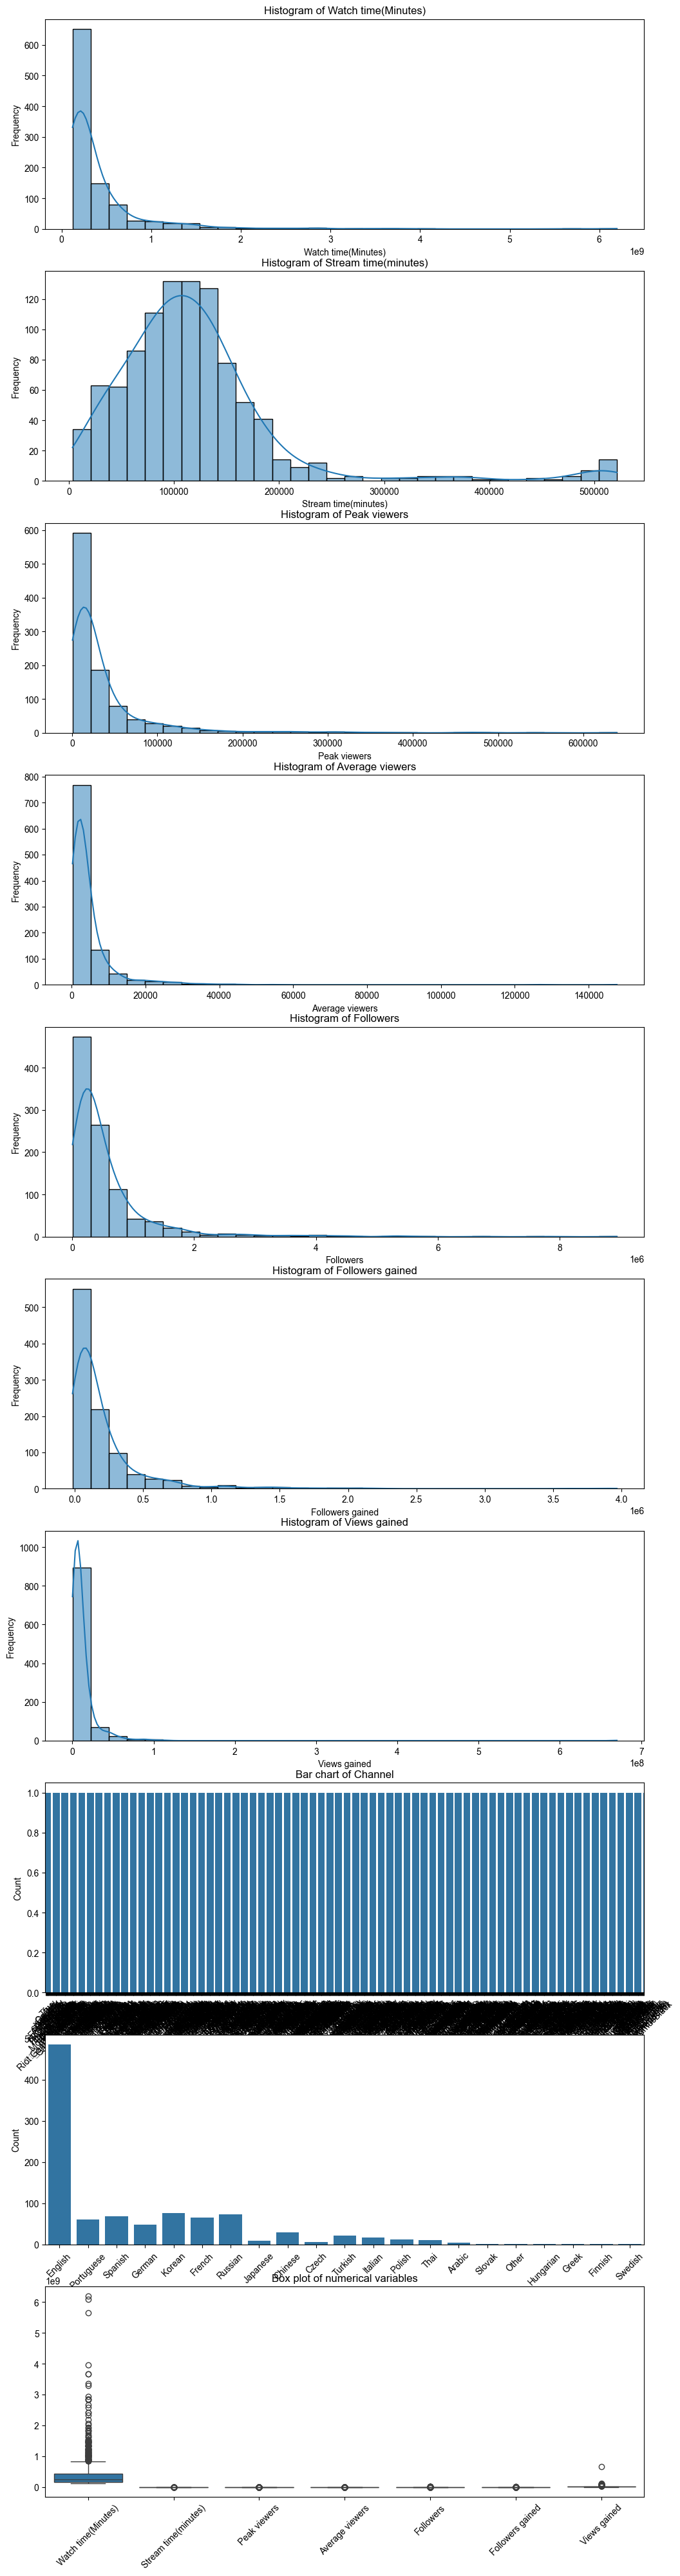

In [22]:
import pandas as pd          
import numpy as np            
import matplotlib.pyplot as plt   
import seaborn as sns 
import warnings

# Load the dataset
dataset = pd.read_csv("apple-stock.csv")
dataset.info()

# Check for null values
null_values = dataset.isnull().sum()
print(null_values)

# Separate numerical and categorical columns
numerical_cols = dataset.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = dataset.select_dtypes(include=[object]).columns.tolist()

# Set a font that supports CJK characters
plt.rcParams['font.family'] = 'Arial'  # or another font you have

# Create a grid for the plots
n_numerical = len(numerical_cols)
n_categorical = len(categorical_cols)

# Create a grid for the plots
fig, axes = plt.subplots(n_numerical + n_categorical + 1, 1, figsize=(12, 5 * (n_numerical + n_categorical + 1)))

# Suppress warnings during plotting
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    # Plot histograms for numerical variables
    for i, col in enumerate(numerical_cols):
        sns.histplot(dataset[col], bins=30, kde=True, ax=axes[i])
        axes[i].set_title(f'Histogram of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

        # Calculate statistics
        max_val = dataset[col].max()
        min_val = dataset[col].min()
        mean_val = dataset[col].mean()
        median_val = dataset[col].median()
        q1 = dataset[col].quantile(0.25)
        q3 = dataset[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)]
        
        print(f'Statistics for {col}:')
        print(f'Max: {max_val}, Min: {min_val}, Mean: {mean_val}, Median: {median_val}')
        print(f'Outliers:\n{outliers}\n')

    # Plot bar charts for categorical variables
    for j, col in enumerate(categorical_cols):
        sns.countplot(data=dataset, x=col, ax=axes[n_numerical + j])
        axes[n_numerical + j].set_title(f'Bar chart of {col}')
        axes[n_numerical + j].set_xlabel(col)
        axes[n_numerical + j].set_ylabel('Count')
        axes[n_numerical + j].tick_params(axis='x', rotation=45)

    # Create a box plot for all numerical variables
    sns.boxplot(data=dataset[numerical_cols], ax=axes[n_numerical + n_categorical])
    axes[n_numerical + n_categorical].set_title('Box plot of numerical variables')
    axes[n_numerical + n_categorical].tick_params(axis='x', rotation=45)

# Show the combined plots
plt.show()


Process histogram for each column